![logo.png](logo.png)

# Supercell Data Scientist Pre-Test
---

**Please solve the following tasks.**

## Task 1: How does the revenue trickle?

The database contains three tables: `account`, `account_device` and
`transactions`. `account` contains user profiles, `account_device` their devices and `transactions` contains in-app purchases.

-   How much revenue was produced on 2013-02-01?
-   Are there any users who use both iPads and iPhones?
-   Which country produces the most revenue?
-   What is the iPad/iPhone split in Canada?
-   What proportion of lifetime revenue is generated on the player's
    first week in game?

If you believe the data we've provided is not sufficient for a task,
please outline your concerns in your report with suggestions.

Feel free to use tables and plots.

## Task 2: Visualize this!

Please visualize a single aspect of the data you find important.

-   Why did you choose this particular visualization?
-   What would you improve in your visualization?
-   What would be your conclusions and recommendations to the game team based on this visualization?

## Task 3: Patterns?

Please apply a suitable machine learning technique to the data.

-   Why did you choose this particular technique?
-   What would you improve in your model?
-   What would be your conclusions and recommendations to the game team
    based on this model?

In [147]:
import pandas as pd
import numpy as np

In [181]:
account = pd.read_csv('account.csv')
account.head()

,account_id,created_date,last_login_date,last_login_country,last_login_city,create_country,language,gender,birth_year,age_seconds,session_count
0,0-2786671,2013-01-04 09:28:07,2013-01-04 10:47:40,IT,NaN,IT,EN,0,NaN,1821,2
1,0-2787228,2013-01-04 10:09:03,2013-02-28 17:47:07,QA,NaN,QA,EN,0,NaN,2843,11
2,0-2787785,2013-01-04 10:48:38,2013-01-05 12:48:43,IL,Ramla,IL,EN,0,NaN,553,2
3,0-2788342,2013-01-04 11:26:38,2013-04-03 11:12:09,ES,Terrassa,ES,EN,0,NaN,7895,14
4,0-2788899,2013-01-04 12:02:53,2013-03-09 06:01:59,MN,NaN,MN,EN,0,NaN,25666,41


In [3]:
account_device = pd.read_csv('account_device.csv')
account_device.head()

,account_id,device
0,0-2786671,"iPod4,1"
1,0-2787228,"iPhone4,1"
2,0-2787785,"iPhone4,1"
3,0-2788342,"iPad2,1"
4,0-2788899,"iPad1,1"


In [6]:
transactions = pd.read_csv('transactions.csv')
transactions.head()

,id,account_id,in_game_currency_amoung,created_time,currency_code,cash_amount
0,1603767,0-2845869,1200,2013-01-07 09:31:32,USD,3.99
1,1604990,0-2836366,2500,2013-01-07 13:02:16,USD,6.99
2,1633303,0-2869440,1200,2013-01-10 00:12:07,USD,3.99
3,1653538,0-2869440,500,2013-01-11 00:50:06,USD,1.99
4,1660951,0-2914532,1200,2013-01-11 07:24:42,USD,3.99


## How much revenue was produced on 2013-02-01? 

In [10]:
transactions['created_time'] = pd.to_datetime(transactions['created_time'])

In [20]:
amount = transactions[transactions['created_time'].dt.date == pd.to_datetime('2013-02-01').date()]['cash_amount'].sum()

In [25]:
print('Revenue produced on 2013-02-01 is: ', round(amount, 2), 'USD')

Revenue produced on 2013-02-01 is:  159.64 USD


## Are there any users who use both iPads and iPhones?

In [65]:
account_device['user_id'] = account_device['account_id'].str.split('-').str[1]

In [71]:
# First, let's create a new column 'device_type' in the DataFrame to store the main device type
account_device['device_type'] = account_device['device'].str.split(',').str[0]

# Next, let's create a DataFrame where each user has a list of unique devices they've used
user_devices = account_device.groupby('user_id')['device_type'].unique().reset_index()

# Now, we apply the lambda function to check if a user has used both an iPhone and an iPad
both_devices_users = user_devices[user_devices['device_type'].apply(
    lambda devices: any('iPhone' in device for device in devices) and any('iPad' in device for device in devices)
)]
print(both_devices_users)

       user_id       device_type
394    1111324  [iPhone3, iPad2]
400    1112432  [iPad2, iPhone3]
403    1112986  [iPhone4, iPad3]
427    1117418  [iPhone3, iPad3]
436    1119080  [iPad3, iPhone4]
...        ...               ...
12990  3849514  [iPhone4, iPad2]
12997  3850806  [iPhone5, iPad3]
13013  3854179  [iPhone4, iPad2]
13031  3857544  [iPad2, iPhone3]
13037  3858840  [iPhone5, iPad3]

[1597 rows x 2 columns]


### There are 1597 unique users that are using both iphone and ipad

## Which country produces the most revenue?

In [79]:
result = transactions.merge(account, on='account_id', how='left').groupby('create_country').agg({"cash_amount": "sum"})

# Sorting the DataFrame
sorted_result = result.sort_values('cash_amount', ascending=False)

sorted_result.head(1)


,cash_amount
create_country,
US,5604.97


## What is the iPad/iPhone split in Canada?

In [88]:
canada_ids = pd.DataFrame(account[account['create_country'] == 'CA']['account_id'])
canada_ids.head()

,account_id
70,0-2825712
74,0-2827981
83,0-2833012
104,0-2844751
125,0-2856560


In [90]:
canada_ids = canada_ids.merge(account_device, on='account_id', how='left')
canada_ids.head()

,account_id,device,user_id,device_type
0,0-2825712,"iPod4,1",2825712,iPod4
1,0-2827981,"iPhone4,1",2827981,iPhone4
2,0-2833012,"iPhone4,1",2833012,iPhone4
3,0-2844751,"iPad2,2",2844751,iPad2
4,0-2856560,"iPad2,4",2856560,iPad2


In [97]:
# Get counts for 'iPhone' and 'iPad'
iphone_counts = canada_ids[canada_ids['device_type'].str.contains('iPhone')].shape[0]
ipad_counts = canada_ids[canada_ids['device_type'].str.contains('iPad')].shape[0]

# Print the counts
print(f"Number of iPhone entries: {iphone_counts}")
print(f"Number of iPad entries: {ipad_counts}")

# If you want the ratio of iPad to iPhone entries, you can calculate it like this:
if iphone_counts != 0:
    ratio = ipad_counts / iphone_counts
    print(f"Ratio of iPad to iPhone entries: {ratio}")
else:
    print("Cannot calculate ratio, number of iPhone entries is zero.")


Number of iPhone entries: 328
Number of iPad entries: 205
Ratio of iPad to iPhone entries: 0.625


## What proportion of lifetime revenue is generated on the player's first week in game?

In [123]:
users_revenue = transactions.merge(account, on='account_id', how='left')[[
    'account_id', 'created_date', 'created_time', 'cash_amount'
]]

In [124]:
users_revenue['account_id'] = users_revenue['account_id'].str.split('-').str[1]

In [125]:
# Convert columns to datetime
users_revenue['created_date'] = pd.to_datetime(users_revenue['created_date'])
users_revenue['created_time'] = pd.to_datetime(users_revenue['created_time'])

# Calculate end of first week for each user
users_revenue['end_of_first_week'] = users_revenue['created_date'] + pd.DateOffset(weeks=1)

# Calculate payment in first week
df_first_week = users_revenue[users_revenue['created_time'] <= users_revenue['end_of_first_week']]
first_week_payment = df_first_week.groupby('account_id')['cash_amount'].sum()

# Calculate total payment
total_payment = users_revenue.groupby('account_id')['cash_amount'].sum()

# Calculate proportion
proportion = first_week_payment / total_payment


In [126]:
proportion.reset_index(name='one_week_to_life_time').dropna()

,account_id,one_week_to_life_time
0,1000508,1.000000
1,100160,0.692649
2,1012600,1.000000
4,1027514,1.000000
5,1037610,1.000000
...,...,...
1071,957222,1.000000
1072,967494,1.000000
1074,971355,1.000000
1075,975840,1.000000


# Machine Learning

In [202]:
account = pd.read_csv('account.csv')
account.head()

,account_id,created_date,last_login_date,last_login_country,last_login_city,create_country,language,gender,birth_year,age_seconds,session_count
0,0-2786671,2013-01-04 09:28:07,2013-01-04 10:47:40,IT,NaN,IT,EN,0,NaN,1821,2
1,0-2787228,2013-01-04 10:09:03,2013-02-28 17:47:07,QA,NaN,QA,EN,0,NaN,2843,11
2,0-2787785,2013-01-04 10:48:38,2013-01-05 12:48:43,IL,Ramla,IL,EN,0,NaN,553,2
3,0-2788342,2013-01-04 11:26:38,2013-04-03 11:12:09,ES,Terrassa,ES,EN,0,NaN,7895,14
4,0-2788899,2013-01-04 12:02:53,2013-03-09 06:01:59,MN,NaN,MN,EN,0,NaN,25666,41


In [203]:
account['account_id'] = account.account_id.str.split('-').str[1]

In [204]:
account.drop(columns=['birth_year'], inplace=True)
account['account_id'] = account['account_id'].astype(int)

In [205]:
account.head()

,account_id,created_date,last_login_date,last_login_country,last_login_city,create_country,language,gender,age_seconds,session_count
0,2786671,2013-01-04 09:28:07,2013-01-04 10:47:40,IT,NaN,IT,EN,0,1821,2
1,2787228,2013-01-04 10:09:03,2013-02-28 17:47:07,QA,NaN,QA,EN,0,2843,11
2,2787785,2013-01-04 10:48:38,2013-01-05 12:48:43,IL,Ramla,IL,EN,0,553,2
3,2788342,2013-01-04 11:26:38,2013-04-03 11:12:09,ES,Terrassa,ES,EN,0,7895,14
4,2788899,2013-01-04 12:02:53,2013-03-09 06:01:59,MN,NaN,MN,EN,0,25666,41


In [209]:
account['created_date'] = pd.to_datetime(account['created_date'])
account['last_login_date'] = pd.to_datetime(account['last_login_date'])
account.head()

,account_id,created_date,last_login_date,last_login_country,last_login_city,create_country,language,gender,age_seconds,session_count
0,2786671,2013-01-04 09:28:07,2013-01-04 10:47:40,IT,NaN,IT,EN,0,1821,2
1,2787228,2013-01-04 10:09:03,2013-02-28 17:47:07,QA,NaN,QA,EN,0,2843,11
2,2787785,2013-01-04 10:48:38,2013-01-05 12:48:43,IL,Ramla,IL,EN,0,553,2
3,2788342,2013-01-04 11:26:38,2013-04-03 11:12:09,ES,Terrassa,ES,EN,0,7895,14
4,2788899,2013-01-04 12:02:53,2013-03-09 06:01:59,MN,NaN,MN,EN,0,25666,41


In [210]:
# Sort by account_id and last_login_date
account.sort_values(['account_id', 'last_login_date'], inplace=True)
# Fill NaN with 'Unknown' (or any other term you'd prefer)
account[['last_login_country', 'last_login_city']] = account[['last_login_country', 'last_login_city']].fillna('Unknown')

account.head()

,account_id,created_date,last_login_date,last_login_country,last_login_city,create_country,language,gender,age_seconds,session_count
14399,589,2013-02-05 10:09:30,2013-02-05 10:09:30,CN,Henan,CN,EN,0,32,1
18394,624,2013-03-12 16:38:30,2013-04-04 16:02:20,FR,Bastia,FR,EN,0,18895,88
14400,1178,2013-02-05 10:39:35,2013-02-24 16:12:21,BG,Rousse,BG,EN,0,2755,7
18395,1248,2013-03-12 16:47:42,2013-03-24 18:05:24,US,Greenville,US,EN,0,1661,7
14401,1767,2013-02-05 11:08:27,2013-04-03 13:55:15,TR,Ankara,DE,EN,0,67786,477


In [211]:
# Fill NaN with 'Unknown' (or any other term you'd prefer)
account[['last_login_country', 'last_login_city']] = account[['last_login_country', 'last_login_city']].fillna('Unknown')

# Group by account_id
agg_df = account.groupby('account_id').agg({
    'session_count': np.sum,
    'age_seconds': np.sum,
    'created_date': np.min,
    'last_login_date': np.max,
    'last_login_country': 'last',
    'last_login_city': 'last'
}).reset_index()


In [212]:
agg_df.drop(columns=['last_login_city'], inplace=True)
agg_df.head()

,account_id,session_count,age_seconds,created_date,last_login_date,last_login_country
0,589,1,32,2013-02-05 10:09:30,2013-02-05 10:09:30,CN
1,624,88,18895,2013-03-12 16:38:30,2013-04-04 16:02:20,FR
2,1178,7,2755,2013-02-05 10:39:35,2013-02-24 16:12:21,BG
3,1248,7,1661,2013-03-12 16:47:42,2013-03-24 18:05:24,US
4,1767,477,67786,2013-02-05 11:08:27,2013-04-03 13:55:15,TR


In [217]:
total_amount_paid = transactions.groupby('account_id').agg({'cash_amount': 'sum'}).reset_index()
total_amount_paid.head()

,account_id,cash_amount
0,0-2802267,37.93
1,0-2805624,5.97
2,0-2812320,3.98
3,0-2818458,36.90
4,0-2829099,3.99


In [218]:
total_amount_paid['account_id'] = total_amount_paid.account_id.str.split('-').str[1].astype(int)
total_amount_paid.head()

,account_id,cash_amount
0,2802267,37.93
1,2805624,5.97
2,2812320,3.98
3,2818458,36.90
4,2829099,3.99


In [220]:
agg_df = agg_df.merge(total_amount_paid, how='left', on='account_id')

In [221]:
agg_df.head()

,account_id,session_count,age_seconds,created_date,last_login_date,last_login_country,cash_amount
0,589,1,32,2013-02-05 10:09:30,2013-02-05 10:09:30,CN,NaN
1,624,88,18895,2013-03-12 16:38:30,2013-04-04 16:02:20,FR,NaN
2,1178,7,2755,2013-02-05 10:39:35,2013-02-24 16:12:21,BG,NaN
3,1248,7,1661,2013-03-12 16:47:42,2013-03-24 18:05:24,US,NaN
4,1767,477,67786,2013-02-05 11:08:27,2013-04-03 13:55:15,TR,NaN


In [224]:
agg_df.fillna(0, inplace=True)

In [225]:
agg_df.head()

,account_id,session_count,age_seconds,created_date,last_login_date,last_login_country,cash_amount
0,589,1,32,2013-02-05 10:09:30,2013-02-05 10:09:30,CN,0.0
1,624,88,18895,2013-03-12 16:38:30,2013-04-04 16:02:20,FR,0.0
2,1178,7,2755,2013-02-05 10:39:35,2013-02-24 16:12:21,BG,0.0
3,1248,7,1661,2013-03-12 16:47:42,2013-03-24 18:05:24,US,0.0
4,1767,477,67786,2013-02-05 11:08:27,2013-04-03 13:55:15,TR,0.0


In [227]:
# step 1: find the 'current date'
current_date = agg_df['last_login_date'].max()

# step 2 and 3: calculate the difference and mark as churned or not
agg_df['churned'] = (current_date - agg_df['last_login_date']).dt.days >= 7

# optional: convert the 'churned' column to integers, where True=1 and False=0
agg_df['churned'] = agg_df['churned'].astype(int)


In [230]:
agg_df.head()

,account_id,session_count,age_seconds,created_date,last_login_date,last_login_country,cash_amount,churned
0,589,1,32,2013-02-05 10:09:30,2013-02-05 10:09:30,CN,0.0,1
1,624,88,18895,2013-03-12 16:38:30,2013-04-04 16:02:20,FR,0.0,0
2,1178,7,2755,2013-02-05 10:39:35,2013-02-24 16:12:21,BG,0.0,1
3,1248,7,1661,2013-03-12 16:47:42,2013-03-24 18:05:24,US,0.0,1
4,1767,477,67786,2013-02-05 11:08:27,2013-04-03 13:55:15,TR,0.0,0


### Feature Engineering

In [231]:
# User Tenure
agg_df['user_tenure'] = (agg_df['last_login_date'] - agg_df['created_date']).dt.days

# Days since Last Login
agg_df['days_since_last_login'] = (current_date - agg_df['last_login_date']).dt.days

# Account Age
agg_df['account_age'] = (current_date - agg_df['created_date']).dt.days


In [236]:
mean_encode = agg_df.groupby('last_login_country')['churned'].mean()
agg_df.loc[:, 'country_enc'] = agg_df['last_login_country'].map(mean_encode)
agg_df.head()

,account_id,session_count,age_seconds,created_date,last_login_date,last_login_country,cash_amount,churned,user_tenure,days_since_last_login,account_age,country_enc
0,589,1,32,2013-02-05 10:09:30,2013-02-05 10:09:30,CN,0.0,1,0,58,58,0.652658
1,624,88,18895,2013-03-12 16:38:30,2013-04-04 16:02:20,FR,0.0,0,22,0,23,0.475000
2,1178,7,2755,2013-02-05 10:39:35,2013-02-24 16:12:21,BG,0.0,1,19,39,58,0.769231
3,1248,7,1661,2013-03-12 16:47:42,2013-03-24 18:05:24,US,0.0,1,12,11,23,0.551937
4,1767,477,67786,2013-02-05 11:08:27,2013-04-03 13:55:15,TR,0.0,0,57,1,58,0.593750


In [239]:
from sklearn.preprocessing import StandardScaler

# define the scaler
scaler = StandardScaler()

# list of columns to scale
columns_to_scale = ['age_seconds', 'cash_amount', 'user_tenure', 'days_since_last_login', 'account_age', 'session_count']

# apply the scaler to the dataframe
agg_df[columns_to_scale] = scaler.fit_transform(agg_df[columns_to_scale])


In [241]:
ready_data = agg_df.drop(columns=['account_id', 'last_login_country', 'created_date', 'last_login_date'])

In [242]:
ready_data

,session_count,age_seconds,cash_amount,churned,user_tenure,days_since_last_login,account_age,country_enc
0,-0.455848,-0.399190,-0.107815,1,-0.786475,1.232430,0.446277,0.652658
1,-0.226302,-0.269372,-0.107815,0,0.031883,-0.884263,-0.818969,0.475000
2,-0.440017,-0.380449,-0.107815,1,-0.079711,0.539031,0.446277,0.769231
3,-0.440017,-0.387979,-0.107815,1,-0.340098,-0.482821,-0.818969,0.551937
4,0.800059,0.067102,-0.107815,0,1.333817,-0.847768,0.446277,0.593750
...,...,...,...,...,...,...,...,...
15546,-0.450571,-0.395212,-0.107815,0,-0.786475,-0.884263,-1.650417,0.551331
15547,-0.455848,-0.399389,-0.107815,0,-0.786475,-0.884263,-1.650417,0.538600
15548,-0.455848,-0.398653,-0.107815,0,-0.786475,-0.884263,-1.650417,0.615385
15549,-0.453210,-0.396471,-0.107815,0,-0.786475,-0.884263,-1.650417,0.493171


In [243]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# define the feature matrix and target variable
X = ready_data.drop('churned', axis=1)
y = ready_data['churned']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create an instance of LogisticRegression
logreg = LogisticRegression()

# fit the model to the training data
logreg.fit(X_train, y_train)

# predict the labels for the test set
y_pred = logreg.predict(X_test)

# print the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9987142397942783
Confusion Matrix:
 [[1346    0]
 [   4 1761]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1346
           1       1.00      1.00      1.00      1765

    accuracy                           1.00      3111
   macro avg       1.00      1.00      1.00      3111
weighted avg       1.00      1.00      1.00      3111



In [249]:
from sklearn.ensemble import RandomForestClassifier

features = ready_data.drop(columns='churned')
target = ready_data['churned']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [250]:
# predict the labels for the test set
y_pred_rf = rf.predict(X_test)

# print the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 1.0
Confusion Matrix:
 [[1346    0]
 [   0 1765]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1346
           1       1.00      1.00      1.00      1765

    accuracy                           1.00      3111
   macro avg       1.00      1.00      1.00      3111
weighted avg       1.00      1.00      1.00      3111



In [253]:
X_train

,session_count,age_seconds,cash_amount,user_tenure,days_since_last_login,account_age,country_enc
9946,0.000606,-0.118915,-0.107815,1.259420,-0.884263,0.337828,0.546012
8771,-0.440017,-0.375508,-0.107815,-0.749277,1.414904,0.663177,0.430809
11617,-0.234217,-0.161467,-0.107815,0.775845,-0.884263,-0.095971,0.551937
11387,-0.231579,-0.287685,-0.107815,0.924638,-0.884263,0.012478,0.545455
12177,-0.453210,-0.398254,-0.107815,-0.786475,0.612020,-0.168271,0.528846
...,...,...,...,...,...,...,...
5191,1.274982,0.940981,-0.107815,2.338166,-0.774778,1.530774,0.551937
13418,-0.453210,-0.399155,-0.107815,-0.786475,0.356557,-0.421320,0.551937
5390,0.818528,1.140191,0.128345,2.412562,-0.884263,1.458474,0.546012
860,-0.455848,-0.398859,-0.107815,-0.786475,1.049957,0.265528,0.551937


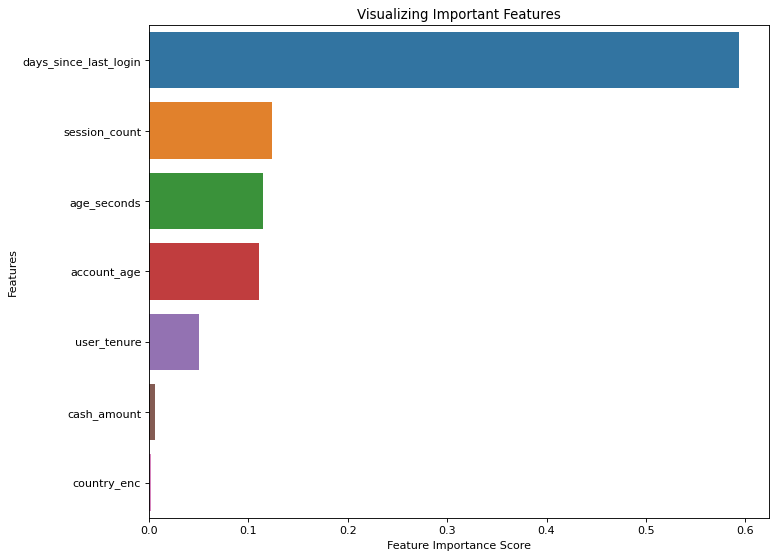

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X_train.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
plt.figure(figsize=(10,8), dpi=80)
sns.barplot(x=f_importances, y=f_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
